In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [8]:
os.chdir('../')

In [9]:
os.getcwd()

'/Users/alanliu99/Documents/GitHub/yelp-recommender-system'

In [11]:
review.head()

,review_id,business_id,text,stars,user_id
0,xQY8N_XvtGbearJ5X4QryQ,-MhfebM0QIsKt87iDN-FNw,"As someone who has worked with many museums, I...",2.0,OwjRMXRC0KyPrIlcjaXeFQ
1,UmFMZ8PyXZTY2QcwzsfQYA,lbrU8StCq3yDfr-QMnGrmQ,I am actually horrified this place is still in...,1.0,nIJD_7ZXHq-FX8byPMOkMQ
2,LG2ZaYiOgpr2DK_90pYjNw,HQl28KMwrEKHqhFrrDqVNQ,I love Deagan's. I do. I really do. The atmosp...,5.0,V34qejxNsCbcgD8C0HVk-Q
3,i6g_oA9Yf9Y31qt0wibXpw,5JxlZaqCnk1MnbgRirs40Q,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",1.0,ofKDkJKXSKZXu5xJNGiiBQ
4,6TdNDKywdbjoTkizeMce8A,IS4cv902ykd8wj1TR0N3-A,"Oh happy day, finally have a Canes near my cas...",4.0,UgMW8bLE0QMJDCkQ1Ax5Mg


In [10]:
review = pd.read_csv('data/reviews_1.csv')

In [15]:
test = review.head(5000)
test

,review_id,business_id,text,stars,user_id
0,xQY8N_XvtGbearJ5X4QryQ,-MhfebM0QIsKt87iDN-FNw,"As someone who has worked with many museums, I...",2.0,OwjRMXRC0KyPrIlcjaXeFQ
1,UmFMZ8PyXZTY2QcwzsfQYA,lbrU8StCq3yDfr-QMnGrmQ,I am actually horrified this place is still in...,1.0,nIJD_7ZXHq-FX8byPMOkMQ
2,LG2ZaYiOgpr2DK_90pYjNw,HQl28KMwrEKHqhFrrDqVNQ,I love Deagan's. I do. I really do. The atmosp...,5.0,V34qejxNsCbcgD8C0HVk-Q
3,i6g_oA9Yf9Y31qt0wibXpw,5JxlZaqCnk1MnbgRirs40Q,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",1.0,ofKDkJKXSKZXu5xJNGiiBQ
4,6TdNDKywdbjoTkizeMce8A,IS4cv902ykd8wj1TR0N3-A,"Oh happy day, finally have a Canes near my cas...",4.0,UgMW8bLE0QMJDCkQ1Ax5Mg
...,...,...,...,...,...
4995,C3ca5SRS2CdTJRkNwGCkSQ,Ws8V970-mQt2X9CwCuT5zw,Introduced another newbie to the Tea Loft. Sti...,5.0,wxeTtPILiMl1L-yBB-D2HA
4996,WLiseHe8i1D2boxJ7z8onw,ZlJNQ3SmgvJU0FiwJY92YQ,"Wanted to try out a new nail place, and wish I...",2.0,-fu8pFYiPI0o5yZtcBUu1A
4997,R0S39Ntc8fq5fccT1gc4Dw,sfd19Wo_7g2TwaoJmA9B8A,How unfortunate. \n\nI recently moved into the...,1.0,M6v37Q3fCL0rxUXT-pNvFQ
4998,mXFo3CznXTR55OITvmyVXg,SZEFE5hL7aN5nM-A44iPwQ,Gorgeous and romantic interiors. Spectacular ...,5.0,CWetXz9zo91-Jh1QzE3BZg


In [16]:
test.to_csv('test_review',index = False)

In [17]:
user_df = test.user_id.value_counts().sort_values(ascending=False)
[user_df.index[0], user_df.index[1], user_df.index[len(user_df) // 2]]

['CxDOIDnH8gp9KXzpBHJYXw', '1O638BDK_fWuxgTVJwff-A', 'BxV2pTVmYCW15gSZAPMFKQ']

In [26]:
user_df.index[0]

'CxDOIDnH8gp9KXzpBHJYXw'

In [27]:
test.loc[test['user_id'] == user_df.index[0]]

,review_id,business_id,text,stars,user_id
1222,IQ7s_l5jjclIqkREXvBL4g,w9pwbsusI9DI637UYqMctQ,Blood Brothers Brewing is worth the trek to at...,5.0,CxDOIDnH8gp9KXzpBHJYXw
2060,1WduO2WTk1Ya5n-4mZJRaw,ZI8Aa41WiFj1XYJRUC54ug,Thang Long is another Vietnamese Restaurant wi...,3.0,CxDOIDnH8gp9KXzpBHJYXw
2886,YU6Npv4PH5cbNPos0Eg8Mw,FaCxpKgHPgUO9vqyOny5CA,Montreal's bagels. everyone telling me about h...,4.0,CxDOIDnH8gp9KXzpBHJYXw
3835,qS7D3jwLxkQ8Z6Yo36enog,i6TgZAX3733aPIMnzje5-g,2.5 star\n\nMy experience with Arepa is limite...,2.0,CxDOIDnH8gp9KXzpBHJYXw
3987,OzTT0fo8xpYXtVp3Ud7Tkw,nGAw4TZ8pBT7ZQxi-Mxf8Q,I am reviewing Asian King based on their Lunch...,2.0,CxDOIDnH8gp9KXzpBHJYXw
4455,LPoBaMLQZOId0LQbfQQ9Ng,5KL1oii9wm4PGDo5TEMHuA,This is one of the nicest library in the area ...,4.0,CxDOIDnH8gp9KXzpBHJYXw


In [ ]:
Phoenix = pd.read_csv('data/Phoenix_reviews.csv')

In [ ]:
def generate_rest_txt(business_id):
    rest = Phoenix.loc[Phoenix['business_id'] == business_id]
    df = rest[['text']].copy()
    file_path = 'src/restaurant_reviews/' + rest.name.values[0]+'.txt'
    df.to_csv(file_path, header=None, index=None, sep=',', mode='a')
    return

In [ ]:
Phoenix.head(5)

In [ ]:
for i in Phoenix.business_id.value_counts().index[:5].values:
    generate_rest_txt(i)

In [ ]:
pd.read_csv('src/restaurant_reviews//Snooze, An A.M. Eatery.txt', sep=",", header=None)

In [ ]:
Phoenix.business_id.value_counts()

In [ ]:
r = review.user_id.value_counts().to_frame()
r.head(5)

In [ ]:
r[r.user_id<100]

In [ ]:
def generate_user_txt(user_id):
    user = review.loc[review['user_id'] == user_id]
    df = user[['text']].copy()
    file_path = 'src/user_reviews/3.txt'
    df.to_csv(file_path, header=None, index=None, sep=',', mode='a')
    return

In [ ]:
generate_user_txt('CxDOIDnH8gp9KXzpBHJYXw')

In [ ]:
generate_user_txt('nPQb2Modp08EAxZDUaPKdw')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


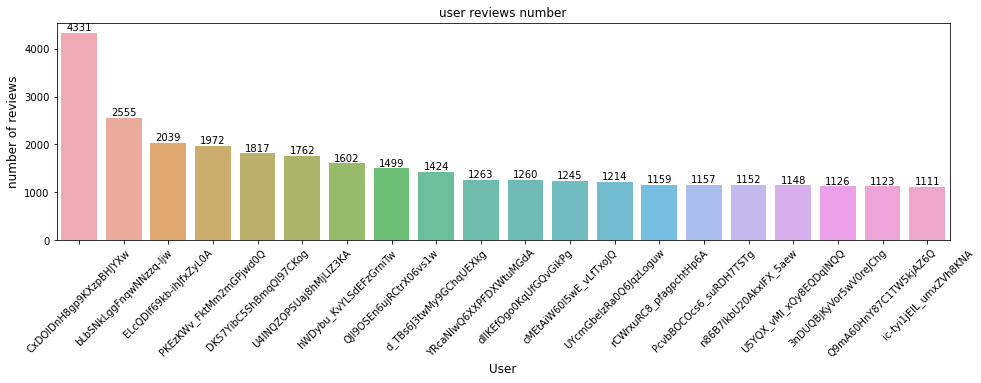

In [46]:
x = review.user_id.value_counts()
x = x.sort_values(ascending=False)
x = x.iloc[0:20]

plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("user reviews number")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('number of reviews', fontsize=12)
plt.xlabel('User', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig("most_20_user.png")

In [42]:
y = review.user_id.value_counts().sort_values(ascending=False)

In [45]:
pd.DataFrame({'user_id':y.index, 'count':y.values})

,user_id,count
0,CxDOIDnH8gp9KXzpBHJYXw,4331
1,bLbSNkLggFnqwNNzzq-Ijw,2555
2,ELcQDlf69kb-ihJfxZyL0A,2039
3,PKEzKWv_FktMm2mGPjwd0Q,1972
4,DK57YibC5ShBmqQl97CKog,1817
...,...,...
1968698,Jq1rL37-2MeM08z_NQXKQg,1
1968699,28obOLTFtD8saZI8djSELg,1
1968700,RlNSNDe6z9T96w-oqvX4oA,1
1968701,xQoYkqKgsP9SDeBa9dEsBw,1


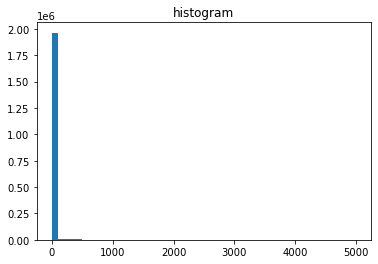

In [15]:
plt.hist(y, bins = [0,100,500,1000,5000]) 
plt.title("histogram") 
plt.show()

In [19]:
review.user_id.value_counts().sort_values(ascending=False)

CxDOIDnH8gp9KXzpBHJYXw    4331
bLbSNkLggFnqwNNzzq-Ijw    2555
ELcQDlf69kb-ihJfxZyL0A    2039
PKEzKWv_FktMm2mGPjwd0Q    1972
DK57YibC5ShBmqQl97CKog    1817
                          ... 
Jq1rL37-2MeM08z_NQXKQg       1
28obOLTFtD8saZI8djSELg       1
RlNSNDe6z9T96w-oqvX4oA       1
xQoYkqKgsP9SDeBa9dEsBw       1
I4IDYzSJe2JEoVZ1uI0sPw       1
Name: user_id, Length: 1968703, dtype: int64

In [28]:
a = review.user_id.value_counts().sort_values(ascending=False)

In [41]:
a[(a.values <= 100)].index[0]

'3mwqzfJCBbYSi_0Tpc_Abg'

In [26]:
review.user_id.value_counts().sort_values(ascending=False)

CxDOIDnH8gp9KXzpBHJYXw    4331
bLbSNkLggFnqwNNzzq-Ijw    2555
ELcQDlf69kb-ihJfxZyL0A    2039
PKEzKWv_FktMm2mGPjwd0Q    1972
DK57YibC5ShBmqQl97CKog    1817
                          ... 
Jq1rL37-2MeM08z_NQXKQg       1
28obOLTFtD8saZI8djSELg       1
RlNSNDe6z9T96w-oqvX4oA       1
xQoYkqKgsP9SDeBa9dEsBw       1
I4IDYzSJe2JEoVZ1uI0sPw       1
Name: user_id, Length: 1968703, dtype: int64